<a href="https://colab.research.google.com/github/fatimaAfzaal/Student_Grade_Prediction_Project/blob/main/Student_Grade_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Grade Prediction Project

## STEP 1:
### Problem definition
We have to define the problem and set goal that we we have to do

## STEP 2:
### Data Collection and Exploration
This is the step where we have to collect the data required. As in our project we get the dataset from kaggle(https://www.kaggle.com/datasets/dipam7/student-grade-prediction)

Also in this step we will explore data to get insight and use visualizations as well if needed to understand data

### Data Collection

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./student.csv')

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3,Test score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,3,4,3,6,5,6,6,9
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,yes,3,3,3,4,5,5,6,13
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,yes,3,2,3,10,7,8,10,11
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,2,2,5,2,15,14,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,3,2,5,4,6,10,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,4,4,11,9,9,9,20
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,yes,4,5,2,3,14,16,16,18
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,3,3,3,10,8,7,6
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,yes,4,1,5,0,11,12,10,8


## Data Exploration

In [2]:
print('Total number of students: ',len(df))

Total number of students:  395


In [3]:
print("Parameter are: ",df.columns)

Parameter are:  Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'failures',
       'Ssupport', 'Gsupport', 'feespaid', 'ecactivities', 'internet',
       'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3',
       'Test score'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        395 non-null    object
 1   sex           395 non-null    object
 2   age           395 non-null    int64 
 3   address       395 non-null    object
 4   famsize       395 non-null    object
 5   Pstatus       395 non-null    object
 6   Medu          395 non-null    int64 
 7   Fedu          395 non-null    int64 
 8   Mjob          393 non-null    object
 9   Fjob          395 non-null    object
 10  guardian      395 non-null    object
 11  traveltime    395 non-null    int64 
 12  studytime     395 non-null    int64 
 13  failures      395 non-null    int64 
 14  Ssupport      395 non-null    object
 15  Gsupport      395 non-null    object
 16  feespaid      395 non-null    object
 17  ecactivities  395 non-null    object
 18  internet      395 non-null    object
 19  freetime

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,G1,G2,G3,Test score
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190,12.559494
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443,4.657114
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,5.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000,9.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000,13.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000,16.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,20.000000


In [6]:
df['G2'].describe()

count    395.000000
mean      10.713924
std        3.761505
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64

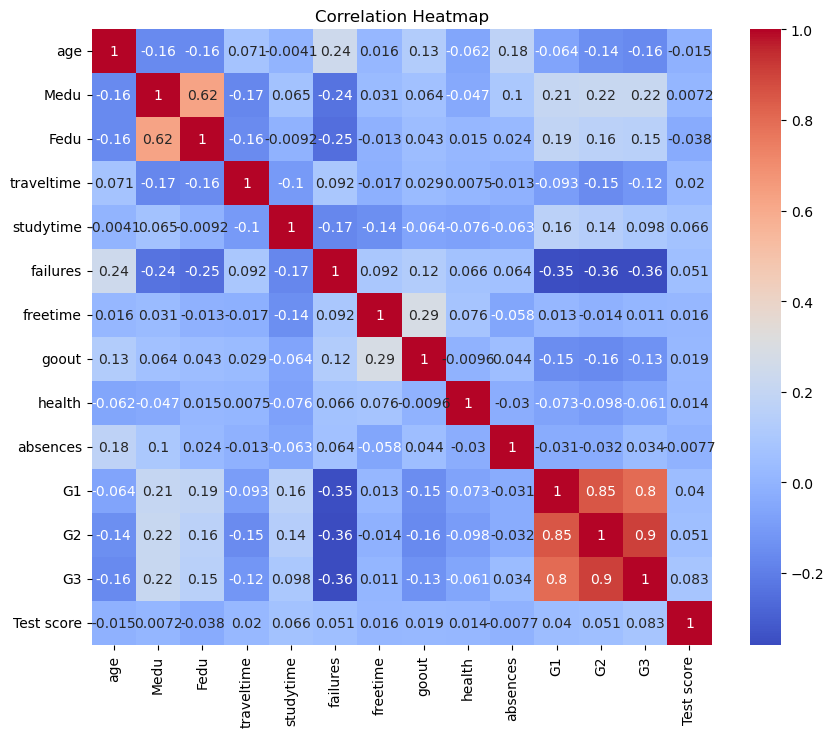

In [7]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<Axes: xlabel='age', ylabel='count'>

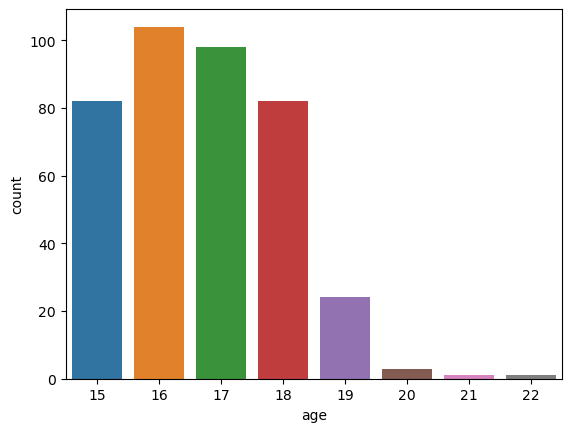

In [8]:
sns.countplot(x="age",data=df)

In [9]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

## STEP 3:
### Data Preprocessing
In this step we will perform task as handling missing values and encode catagorical data



### Handling missing values

In [10]:
df=df.dropna()
print((df.isnull()).sum())

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
guardian        0
traveltime      0
studytime       0
failures        0
Ssupport        0
Gsupport        0
feespaid        0
ecactivities    0
internet        0
freetime        0
goout           0
health          0
absences        0
G1              0
G2              0
G3              0
Test score      0
dtype: int64


### Encoding catagorical variables

In [11]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#for col in df.columns:
#  df[col]=le.fit_transform(df[col])

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical variables
categorical_cols = ["internet", "ecactivities", "feespaid", "Gsupport", "Ssupport", 
                    "guardian", "Fjob", "Mjob", "Pstatus", "famsize", "address", "sex", "school"]

# Apply one-hot encoding
encoder = OneHotEncoder(drop="first", sparse=False)  # Drop first column to avoid multicollinearity
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

# Drop original categorical columns from the DataFrame
df = df.drop(columns=categorical_cols)

# Concatenate the DataFrame with the encoded columns
df_encoded = pd.concat([df, encoded_cols], axis=1)


C:\Users\user\anaconda4\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,G1,G2,G3,Test score
0,18,4,4,2,2,0,3,4,3,6,5,6,6,9
1,17,1,1,1,2,0,3,3,3,4,5,5,6,13
2,15,1,1,1,2,3,3,2,3,10,7,8,10,11
3,15,4,2,1,3,0,2,2,5,2,15,14,15,14
4,16,3,3,1,2,0,3,2,5,4,6,10,10,12


### Finding Correlation between Attributes

In [14]:
df.corr()['G3'].sort_values()

failures     -0.361516
age          -0.159038
goout        -0.131003
traveltime   -0.114305
health       -0.068416
freetime      0.006352
absences      0.035335
Test score    0.083032
studytime     0.100557
Fedu          0.154113
Medu          0.218832
G1            0.800672
G2            0.904715
G3            1.000000
Name: G3, dtype: float64

In [15]:
# df = df.drop(['age'], axis='columns')

In [16]:
most_correlated = df.corr().abs()['G3'].sort_values(ascending=False)
most_correlated = most_correlated[:9]
most_correlated

G3            1.000000
G2            0.904715
G1            0.800672
failures      0.361516
Medu          0.218832
age           0.159038
Fedu          0.154113
goout         0.131003
traveltime    0.114305
Name: G3, dtype: float64

In [17]:
df = df.loc[:, most_correlated.index]
df.head()

,G3,G2,G1,failures,Medu,age,Fedu,goout,traveltime
0,6,6,5,0,4,18,4,4,2
1,6,5,5,0,1,17,1,3,1
2,10,8,7,3,1,15,1,2,1
3,15,14,15,0,4,15,2,2,1
4,10,10,6,0,3,16,3,2,1


# Data spliting
In this step we will split data in to testing and training data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['G3'], test_size = 0.3, random_state=0)

In [19]:
X_train.head()

,G3,G2,G1,failures,Medu,age,Fedu,goout,traveltime
329,14,14,14,0,4,17,4,3,2
175,9,9,10,0,4,17,3,4,2
161,7,9,5,2,3,15,2,4,2
144,0,0,5,3,2,17,1,5,1
219,10,10,9,0,2,17,2,3,1


# Model Selection and Model Training
Firstly we will select the right algorithm according to our requirement and then we will train data on model

In [20]:
X_train = X_train.drop('G3', axis='columns')
X_test = X_test.drop('G3', axis='columns')
lr = LinearRegression()
dt = DecisionTreeRegressor()
dt_model = dt.fit(X_train, y_train)
model = lr.fit(X_train, y_train)

# Model Evaluation or Testing

In [21]:
print(lr.score(X_test, y_test))   #Near to 1, good predicts target
print(dt.score(X_test, y_test))

0.8393444141394707
0.7187830263241568


In [22]:
df.head()

,G3,G2,G1,failures,Medu,age,Fedu,goout,traveltime
0,6,6,5,0,4,18,4,4,2
1,6,5,5,0,1,17,1,3,1
2,10,8,7,3,1,15,1,2,1
3,15,14,15,0,4,15,2,2,1
4,10,10,6,0,3,16,3,2,1


In [23]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted Grade')

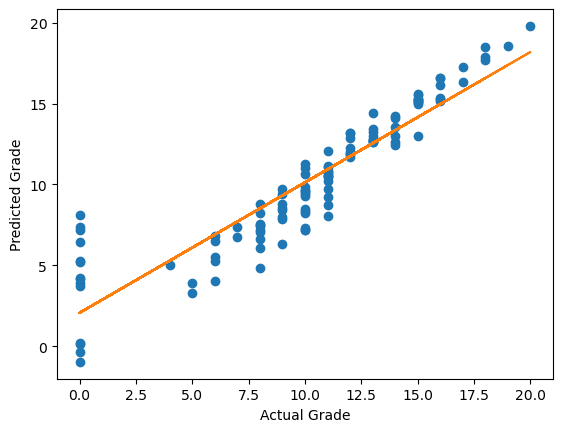

In [24]:
plt.plot(y_test, predictions, 'o')
m, b = np.polyfit(y_test,predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")

In [25]:
# User Input for Prediction
user_input = {}  # Dictionary to store user inputs

for col in df.columns:
    if col != 'G3':
        user_input[col] = int(input(f"Enter value for {col}: "))

# Create a DataFrame for user input
user_input_df = pd.DataFrame([user_input])

# Make predictions on user input
predicted_grade = lr.predict(user_input_df)

print("Predicted Grade:", predicted_grade[0])

Enter value for G2: 4
Enter value for G1: 4
Enter value for failures: 0
Enter value for Medu: 2
Enter value for age: 5
Enter value for Fedu: 5
Enter value for goout: 5
Enter value for traveltime: 5
Predicted Grade: 4.864631809520999


In [26]:
from joblib import dump, load

# Save the model
dump(model, 'grade_model.joblib')

# Load the model
loaded_model = load('grade_model.joblib')
